# Project: Identifying Fraud from Enron Email

In [1]:
import pandas as pd
import pickle as pk
import sys
import numpy as np
import pdb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 1000

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

## Understanding the Dataset

### Data Exploration

In [2]:
## Load dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pk.load(data_file)
    
my_dataset = data_dict

In [3]:
## Load the data dictionary into a dataframe
data = pd.DataFrame.from_dict(my_dataset,orient='index')
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [4]:
## Total Number of Data Points
data.size

3066

In [5]:
## Number of Available Features
len(data.columns)

21

In [6]:
## Available Features
sorted(list(data.columns))

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [7]:
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [8]:
## Allocation across classes (POI/non-POI)
data['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [9]:
## Features with missing values
data = data.replace('NaN',np.nan)
data.isnull().sum().sort_values(ascending = False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_poi_to_this_person       60
shared_receipt_with_poi       60
to_messages                   60
from_this_person_to_poi       60
from_messages                 60
other                         53
expenses                      51
salary                        51
exercised_stock_options       44
restricted_stock              36
email_address                 35
total_payments                21
total_stock_value             20
poi                            0
dtype: int64

In [10]:
## Replace NA values with zeros
data = data.replace(np.nan,0.0)

In [11]:
## Replace negative values with zeros
num = data._get_numeric_data()

num[num < 0] = 0

### Outliers

In [12]:
## Removing the 'TOTAL' row
data[data['salary'] == data['salary'].max()]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,0.0,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,0.0,0.0,434509511.0,5235198.0,83925000.0,0.0,42667589.0,0.0,False,1398517.0,0.0,48521928.0,0,0.0


In [13]:
data = data.drop('TOTAL')

In [14]:
## Removing the 'THE TRAVEL AGENCY IN THE PARK' since it isn't an individual
data[data.index == 'THE TRAVEL AGENCY IN THE PARK']

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
THE TRAVEL AGENCY IN THE PARK,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362096.0,0.0,False,0.0,0.0,0.0,0,0.0


In [15]:
data = data.drop('THE TRAVEL AGENCY IN THE PARK')

In [16]:
# Used the outlierCleaner from earlier exercises to remove 15% of point with largest residual error

def outlierCleaner(preds, feature_vals):

    from scipy.stats import percentileofscore

    cleaned_data = []

    diffs = (np.array(feature_vals) - np.array(preds)) ** 2
    diffs = diffs.flatten()
    feature_vals = feature_vals.flatten()
    
    data = zip(feature_vals, diffs)
    
    percentiles = [percentileofscore(diffs, i) for i in diffs]
    
    
    cleaned_data = [ val if percentileofscore(diffs, diff) < 85 else 0.0 for (val,diff) in data]

    return cleaned_data

In [17]:
# Numeric Columns
rel_cols = ['bonus','deferral_payments',
'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [18]:
from sklearn.linear_model import LinearRegression

for f in rel_cols:
    curr_feat = np.reshape( np.array(data[f]), (len(data[f]), 1))
    poi = np.reshape( np.array(data.poi), (len(data.poi), 1))

    reg = LinearRegression()
    reg.fit(curr_feat, poi)

    pred = reg.predict(curr_feat)
    
    cleaned_data = outlierCleaner(pred,curr_feat)
    
    data[f] = cleaned_data

# Free-Response #1

The goal of this project is to classify which employees are persons-of-interest (POIs) in the Enron fraud trial. I intend to test out different machine learning models to classify each employee in the Enron dataset corpus as either a POI or a non-POI. The Enron dataset was originally released by the Federal Energy Regulatory Commission during the investigation. There are 146 total rows and 21 columns with 18 of the records labeled as POIs. A persons-of-interest is defined as a person who was indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

#### 21 Features

> financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

> email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

> POI label: [‘poi’]

#### Identifying Outliers

To identify outliers, I first read through the index of names to flag any values that weren't a person's name. Two labels stuck out: 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK.' 'TOTAL' was clearly the cumulative sum for each column in the dataset, and upon investigating 'THE TRAVEL AGENCY IN THE PARK', I discovered that it was a company owned by Kenneth Lay's sister Sharon. I removed both of these columns since they were not possible POIs. After this manual cleanup, I modified the outlierCleaner function from earlier exercises to remove the 15% of points with the largest residual error. An additional cleanup step I performed was to replace NA and negative values with zeros.

## Optimize Feature Selection/Engineering

### Create new features 

In [19]:
# Financial Columns
fin_cols = ['bonus',
            'deferral_payments',
            'deferred_income',
            'director_fees',
            'exercised_stock_options',
            'expenses',
            'loan_advances',
            'long_term_incentive',
            'restricted_stock',
            'restricted_stock_deferred',
            'salary',
            'total_payments',
            'total_stock_value']

Explained Variance Ratio: [ 0.57327293  0.24269572]
Cumulative Variance 0.815968652538


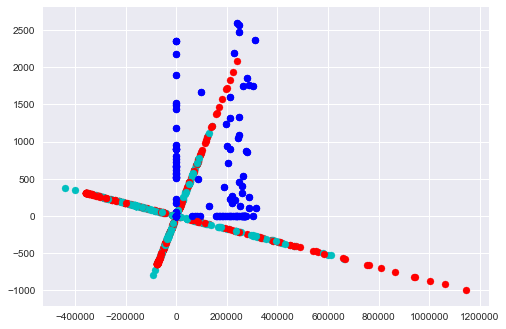

In [20]:
### Use PCA to create new featuress
from sklearn.decomposition import PCA

pca = PCA(n_components = 2,svd_solver='randomized')
pca.fit(data[fin_cols])
pca_values = pca.transform(data[fin_cols])

first_pc = pca.components_[0]
second_pc = pca.components_[1]

pca_df = pd.DataFrame(pca_values,
                      index = data.index)

for ii, jj in zip(pca_values, data.values):
    plt.scatter(first_pc[0]*ii[0], first_pc[1]*ii[0], color='r')
    plt.scatter(first_pc[0]*ii[1], first_pc[1]*ii[1], color='c')
    plt.scatter(jj[0], jj[1], color='b')
    
for ii, jj in zip(pca_values, data.values):
    plt.scatter(second_pc[0]*ii[0], second_pc[1]*ii[0], color='r')
    plt.scatter(second_pc[0]*ii[1], second_pc[1]*ii[1], color='c')
    plt.scatter(jj[0], jj[1], color='b')
    
print 'Explained Variance Ratio:', pca.explained_variance_ratio_
print 'Cumulative Variance', pca.explained_variance_ratio_.cumsum()[1]

In [21]:
data = data.merge(pca_df,left_index=True,right_index=True)

In [22]:
new_cols = data.columns.difference(['poi','email_address'])

### Intelligently select features 

In [23]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif,percentile = 20)
selector.fit(data[new_cols],data['poi'])
features_transformed = selector.transform(data[new_cols])

selector_scores = pd.DataFrame(selector.scores_,index=data[new_cols].columns,columns=['score']) \
                    .sort_values('score',ascending=False)

/Users/lizkalina/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 4  5 11 15] are constant.
  UserWarning)
/Users/lizkalina/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [24]:
# Number of features selected
len(features_transformed[0])

4

In [26]:
selector_scores

,score
other,14.784826
from_messages,9.325131
from_this_person_to_poi,7.926285
to_messages,6.664916
total_payments,6.533898
expenses,5.843789
1,4.808586
from_poi_to_this_person,4.791838
shared_receipt_with_poi,4.139225
restricted_stock,3.592454


### Properly scale features 

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rescaled_weight = scaler.fit_transform(features_transformed)

# Free-Response #2

#### New Features
To create new features, I performed principal component analysis (PCA) on the financial features in the ENRON dataset. I chose to focus on the financial features because they make a bulk of the data and each employee's compensation could be tied to their potential POI status. I wanted to see if deriving the major patterns in these features by reducing their dimensionality would make my algorithm perform better by eliminating some of the noise. Using the PCA module from sklearn, I fit the financial features to two new components, which retained roughly 82% of the datasets original variance. The features created using PCA were then added to the dataset and included in the feature selection.

Ultimately, feature selection did not select these new features as the most relevant. Below in the revision section, I trained my final model with the addition of the two new features and compared it to the original performance; both the Precision and Recall scores decreased making the new F1 Score with PCA features 0.33.

#### Feature Selection
In order to select the features to use in my model, I used the SelectPercentile module to select the 20% of features with the highest ANOVA F-value scores, which resulted in 4 features — 'other', 'from_messages', 'from_this_person_to_poi' and 'to_messages'. I concluded 20% was the optimal percentile after testing many percentiles including 0.10, 0.15, 0.25, 0.30, 0.5, 0.75. All of these percentiles resulted in a worse model performance measured by the F1 Score. Feature scores from my selection process are listed above.

#### Feature Scaling
As a prepatory step before picking an algorithm, I scaled the selected features with the MinMaxScaler module to scale features to a uniform range (i.e. 0 - 1), which is necessary for some algorithms to ensure that numerically larger features won't automatically become the main predictor.

In [100]:
## Revision: Algorithm Performance with and without new features

from sklearn import metrics

pca_cols = ['other','from_messages','from_this_person_to_poi','to_messages',0,1]

selector = SelectPercentile(f_classif,percentile = 100)
selector.fit(data[pca_cols],data['poi'])
pca_features = selector.transform(data[pca_cols])

pca_f_train, pca_f_test, pca_labels_train, pca_labels_test = model_selection.train_test_split(pca_features,data['poi'], test_size=0.2, random_state=67)

pca_metrics_df = pd.DataFrame(columns=['classifier','accuracy','precision','recall','f1_score'],index=['w_pca'])

curr = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=True, random_state=5, splitter='best')

curr = curr.fit(pca_f_train,pca_labels_train)
pca_y_guess = curr.predict(pca_f_test)

pca_metrics_df.loc['w_pca','classifier'] = curr
pca_metrics_df.loc['w_pca','accuracy'] = metrics.accuracy_score(pca_labels_test,pca_y_guess)
pca_metrics_df.loc['w_pca','precision'] = metrics.precision_score(pca_labels_test,pca_y_guess)
pca_metrics_df.loc['w_pca','recall'] = metrics.recall_score(pca_labels_test,pca_y_guess)
pca_metrics_df.loc['w_pca','f1_score'] = metrics.f1_score(pca_labels_test,pca_y_guess) 

pd.concat([pca_metrics_df,passing_clfs])

,classifier,accuracy,precision,recall,f1_score
w_pca,DecisionTreeClassifier(class_weight='balanced'...,0.862069,0.25,0.5,0.333333
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.896552,0.4,1,0.571429
5,DecisionTreeClassifier(class_weight='balanced'...,0.862069,0.333333,1,0.5


## Pick and Tune an Algorithm

### Pick an algorithm

In [27]:
from sklearn import model_selection

classifiers = []

features_train, features_test, labels_train, labels_test = model_selection.train_test_split(rescaled_weight,data['poi'], test_size=0.2, random_state=67)

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)

classifiers.append(clf)

clf.score(features_test,labels_test)

0.82758620689655171

In [29]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(features_train,labels_train)

classifiers.append(clf)

clf.score(features_test,labels_test,)

0.86206896551724133

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(features_train,labels_train)

classifiers.append(clf)

clf.score(features_test,labels_test)

0.89655172413793105

In [31]:
import os
os.environ['PATH'] = os.environ['PATH'] + ';C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(features_train,labels_train)

classifiers.append(clf)

clf.score(features_test,labels_test)

0.82758620689655171

# Free-Response #3

Before testing any models, I split my selected feature data into a training set (80%) and a test set (20%). I trained several models with the training set, and in the following section, I will test the model's performance with the test set. The models I tried were: DecisionTreeClassifier, GaussianNB, KNeighborsClassifier and XGBClassifier. The accuracy  was high across all models; however, this was misleading due to the highly skewed classes where non-POI examples make up 87.5% of the dataset. In order to more accurately capture performance, I ended up using the precision, recall and F1 scores to determine each models performance. 

In [32]:
data['poi'].value_counts()/data['poi'].count()

False    0.875
True     0.125
Name: poi, dtype: float64

### Tune the algorithm

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,5],
             'algorithm':['auto','ball_tree', 'kd_tree'],
             'n_jobs':[1,5],
             'weights':['uniform','distance']}

clf = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')
clf = clf.fit(features_train,labels_train)

best_kneighbors = clf.best_estimator_
classifiers.append(best_kneighbors)

print "Best estimator found by grid search:"
print best_kneighbors

/Users/lizkalina/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best estimator found by grid search:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [34]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3,5],
              "max_depth": [2,3,5,10],
              "min_samples_leaf": [2, 5, 10,15,20],
              "random_state": [None, 5],
              "presort": [True],
              'class_weight':['balanced',{True:9,False:1},{True:8,False:2},{True:7,False:3},{True:6,False:4}]
              }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1')
clf = clf.fit(features_train,labels_train)

best_decision_tree = clf.best_estimator_
classifiers.append(best_decision_tree)

print "Best estimator found by grid search:"
print best_decision_tree

Best estimator found by grid search:
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=True, random_state=5, splitter='best')


In [35]:
# Demonstrates the importance of each feature: 'other','from_messages','from_this_person_to_poi','to_messages'
best_decision_tree.tree_.compute_feature_importances()

array([ 0.28486638,  0.14328137,  0.48773773,  0.08411452])

# Free-Response #4

Parameter tuning is the process of selecting the best parameters for an algorithm to optimize its performance, and is important in creating a model which accurately captures a dataset's patterns. There are many challenges in Machine Learning that require parameters in a model to be modified, and many of these parameters may impact one another. To automate this process, there are packages (such as GridCV in sklearn) which allow you to exhaustively test parameters to determine the optimal values to make your model perform the best based on a defined metric (such as the F1 Score).

In the section above, I tuned the KNeighborsClassifier and DecisionTreeClassifier models using the GridCV module. This module let's you provide a classifier, a parameter dictionary and a scoring function, and then does an exhaustive search returning the combination of parameters that lead to the best model performance.

For KNeighbors, I tuned 'n_neighbors', 'algorithm', 'n_jobs' and 'weights' which returned:

> KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

For DecisionTree, I tuned 'criterion', 'min_samples_split', 'max_depth', 'min_samples_leaf', 'random_state', 'presort' and 'class_weight' which returned:



> DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=True, random_state=5, splitter='best')

With the DecisionTree, I was most concerned with the skewed classes, so I tested many values for the 'class_weight' parameter including ['balanced',{True:9,False:1},{True:8,False:2},{True:7,False:3},{True:6,False:4}]. In the end, the best performing value was 'balanced.'

## Validate and Evaluate

### Algorithm Performance

In [36]:
from sklearn import metrics

metrics_df = pd.DataFrame(columns=['classifier','accuracy','precision','recall','f1_score'])

for idx, clf in enumerate(classifiers):
    curr = clf
    y_guess = curr.predict(features_test)

    metrics_df.loc[idx,'classifier'] = curr
    metrics_df.loc[idx,'accuracy'] = metrics.accuracy_score(labels_test,y_guess)
    metrics_df.loc[idx,'precision'] = metrics.precision_score(labels_test,y_guess)
    metrics_df.loc[idx,'recall'] = metrics.recall_score(labels_test,y_guess)
    metrics_df.loc[idx,'f1_score'] = metrics.f1_score(labels_test,y_guess)    

### Usage of Evaluation Metrics

In [37]:
# 0.3 cutoff based on rubric requirements
passing_clfs = metrics_df[(metrics_df.precision > 0.3) & (metrics_df.recall > 0.3)]
passing_clfs

,classifier,accuracy,precision,recall,f1_score
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.896552,0.4,1,0.571429
5,DecisionTreeClassifier(class_weight='balanced'...,0.862069,0.333333,1,0.5


### Validation Strategy

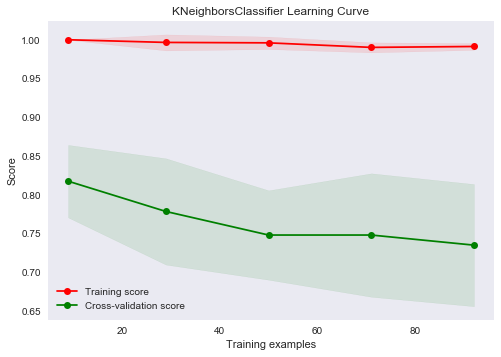

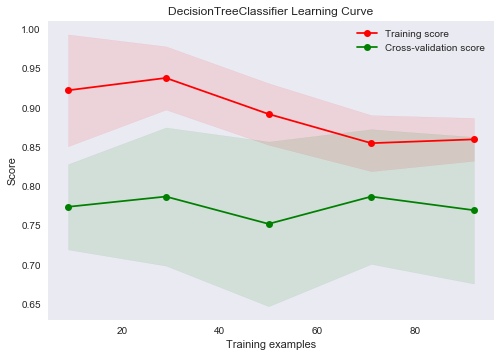

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=20, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for idx in passing_clfs.index:
    cv = ShuffleSplit(n_splits=10, test_size=.20, random_state=42)
    estimator = classifiers[idx]
    title = repr(estimator).split('(')[0] + ' Learning Curve'
    plot_learning_curve(estimator, title, features_train, labels_train, cv=cv)
    plt.show()

# Free-Response #5
In cross-validation, you evaluate how well your model is able to generalize by running the trained model with a testing data set. The purpose of validation is to confirm that your model is an accurate representation of the patterns found in the data rather than being overfit or underfit to the training set.

My validation strategy was to use the ShuffleSplit module to create a cross-validation set with 10 splits, and then plot the learning curve for passing classifiers to check for bias and variance. Learning curves are used to determine if the model performs better with more training examples by showing the prediction accuracy vs. the training set size. Based on the plots above, I believe that my KNeighbors classifier suffers from overfitting since the training score is universally high, while the cross-validation score decreases with more training examples. For the DecisionTree classifier, I see that the training and cross-validation scores converge with more training examples suggesting a decent balance between bias and variance.

# Free-Response #6
In order to select a model with a well-rounded performance, I used a combination of metrics including:

* Accuracy = (true positives + true negatives) / (total examples)
* Precision = (true positives) / (true positives + false positives)
* Recall = (true positives) / (true positives + false negatives)
* F1 score = (2 x precision x recall) / (precision + recall)

In the context of this project, the precision score (aka positive predictive value) measures how certain we are that a person is a POI when the algorithm identifies them as one, while the recall score (aka sensitivity) is the proportion of POIs that the algorithm accurately guesses as POIs.

After filtering out classifiers that did not have at least a 0.3 precision and recall score, only the tuned versions of KNeighbors and DecisionTree remained. Both had high recall scores and middling precision scores, but in the case of searching for POIs, I would much prefer false positives to false negatives. At first glance, KNeighbors appeared to perform better with an F1 Score of 0.571429 to the DecisionTree's 0.5. However, based on my earlier learning curve analysis the KNeighbors is actually overfit to my training data; therefore I decided to proceed with the tuned DecisionTree as my final algorithm!

> DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=True, random_state=5, splitter='best')

### Selected Algorithm

In [39]:
winner = classifiers[5]
print winner

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=True, random_state=5, splitter='best')


In [40]:
output = pd.DataFrame(labels_test)
y_guess = winner.predict(features_test)
output['guess'] = y_guess

In [41]:
# TRUE POSITIVES
output[(output.poi) & (output.guess)]

,poi,guess
GLISAN JR BEN F,True,True
FASTOW ANDREW S,True,True


In [42]:
# FALSE NEGATIVES
output[(output.poi == True) & (output.guess == False)]

,poi,guess


In [43]:
# FALSE POSITIVES
output[(output.poi == False) & (output.guess == True)]

,poi,guess
DERRICK JR. JAMES V,False,True
GARLAND C KEVIN,False,True
LINDHOLM TOD A,False,True
HICKERSON GARY J,False,True


In [44]:
# TRUE NEGATIVES
output[(output.poi == False) & (output.guess == False)]

,poi,guess
FUGH JOHN L,False,False
HAYES ROBERT E,False,False
SULLIVAN-SHAKLOVITZ COLLEEN,False,False
BANNANTINE JAMES M,False,False
PAI LOU L,False,False
BECK SALLY W,False,False
KISHKILL JOSEPH G,False,False
MARTIN AMANDA K,False,False
JAEDICKE ROBERT,False,False
SHANKMAN JEFFREY A,False,False
